In [1]:
#@title Import libraries

import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import functools

In [2]:
#@title Define the ISO 226 table of constants per frequency range

ISO_226_constant_table =  np.array(
      [[20, 0.532, -31.6, 78.5],
       [25, 0.506, -27.2, 68.7],
       [31.5, 0.480, -23.0, 59.5],
       [40, 0.455, -19.1, 51.1],
       [50, 0.432, -15.9, 44.0],
       [63, 0.409, -13.0, 37.5],
       [80, 0.387, -10.3, 31.5],
       [100, 0.367, -8.1, 26.5],
       [125, 0.349, -6.2, 22.1],
       [160, 0.330, -4.5, 17.9],
       [200, 0.315, -3.1, 14.4],
       [250, 0.301, -2.0, 11.4],
       [315, 0.288, -1.1, 8.6],
       [400, 0.276, -0.4, 6.2],
       [500, 0.267, 0.0, 4.4],
       [630, 0.259, 0.3, 3.0],
       [800, 0.253, 0.5, 2.2],
       [1000, 0.250, 0.0, 2.4],
       [1250, 0.246, -2.7, 3.5],
       [1600, 0.244, -4.1, 1.7],
       [2000, 0.243, -1.0, -1.3],
       [2500, 0.243, 1.7, -4.2],
       [3150, 0.243, 2.5, -6.0],
       [4000, 0.242, 1.2, -5.4],
       [5000, 0.242, -2.1, -1.5],
       [6300, 0.245, -7.1, 6.0],
       [8000, 0.254, -11.2, 12.6],
       [10000, 0.271, -10.7, 13.9],
       [12500, 0.301, -3.1, 12.3]], dtype=np.float64)

In [3]:
#@title Extrapolate the ISO 226 constants 3x2500Hz more just following the last gradient.

def extrapolate():
  slope = (ISO_226_constant_table[-1, 1:] - ISO_226_constant_table[-2, 1:]) / (ISO_226_constant_table[-1, 0] - ISO_226_constant_table[-2, 0])
  delta_x = 2500
  new_row = np.append([ISO_226_constant_table[-1, 0] + delta_x], ISO_226_constant_table[-1, 1:] + ISO_226_constant_table[-1, 1:] * slope)
  return np.append(ISO_226_constant_table, [new_row], axis=0)

ISO_226_constant_table = extrapolate()
ISO_226_constant_table = extrapolate()
ISO_226_constant_table = extrapolate()

res.x=array([ 7.07699805e-01,  9.56847202e-02,  1.39454848e+00,  5.17191537e+00,
        1.42505082e+01,  1.89421310e-02,  1.40024559e+00,  6.43211270e+02,
        4.54202241e-01, -2.04904897e+00])


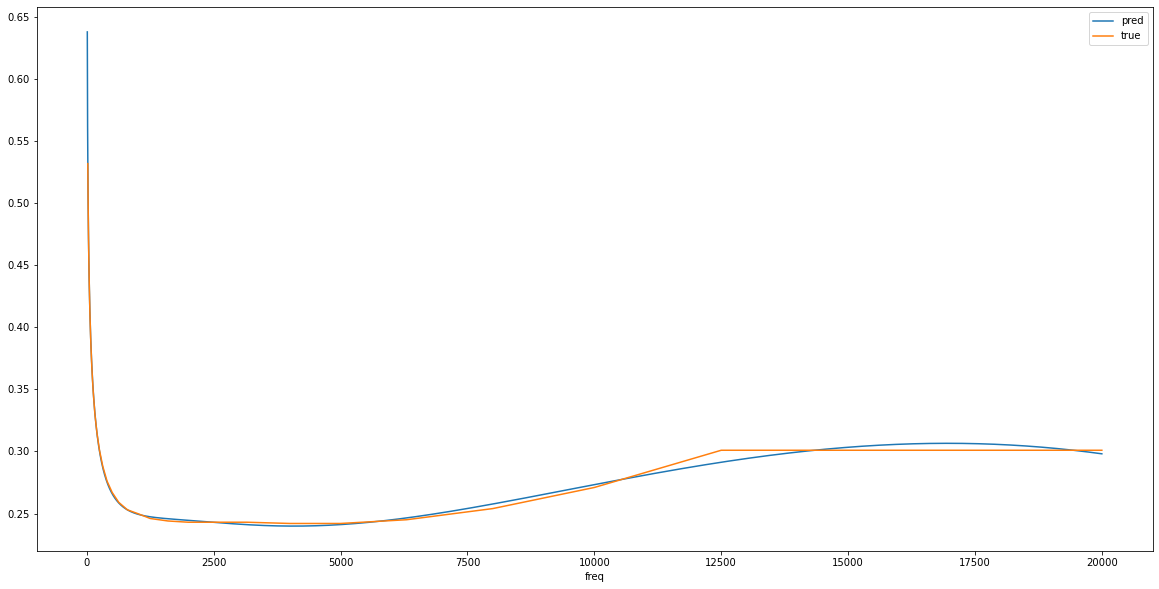

res.x=array([ 1.11007486e+02,  1.16744188e+01,  5.09084895e+01,  1.08211378e+01,
        1.09495723e+00,  4.79483920e-01,  1.07492801e+00,  7.73080187e+01,
        2.24191011e-01, -1.16694726e+00,  1.34093456e+00,  4.71415134e-01,
        1.06548091e+00,  2.37158204e-01, -2.78563078e-04, -6.89758642e+01])


<ipython-input-4-cc5d60b7d9d6>:24: RuntimeWarning: invalid value encountered in log
  return params[0] + params[1] * np.log(params[2] * (x - params[3])) - 5*params[4]* np.exp(-0.00001*params[5]*(x-1500*params[6])**2) + 5*params[7]* np.exp(-0.000001*params[8]*(x-3000*params[9])**2) - 15*params[10]*np.exp(-0.0000001*params[11]*(x-8000*params[12])**2) - 5*params[13]*np.exp(-0.00000001*params[14]*(x-20000*params[15])**2)


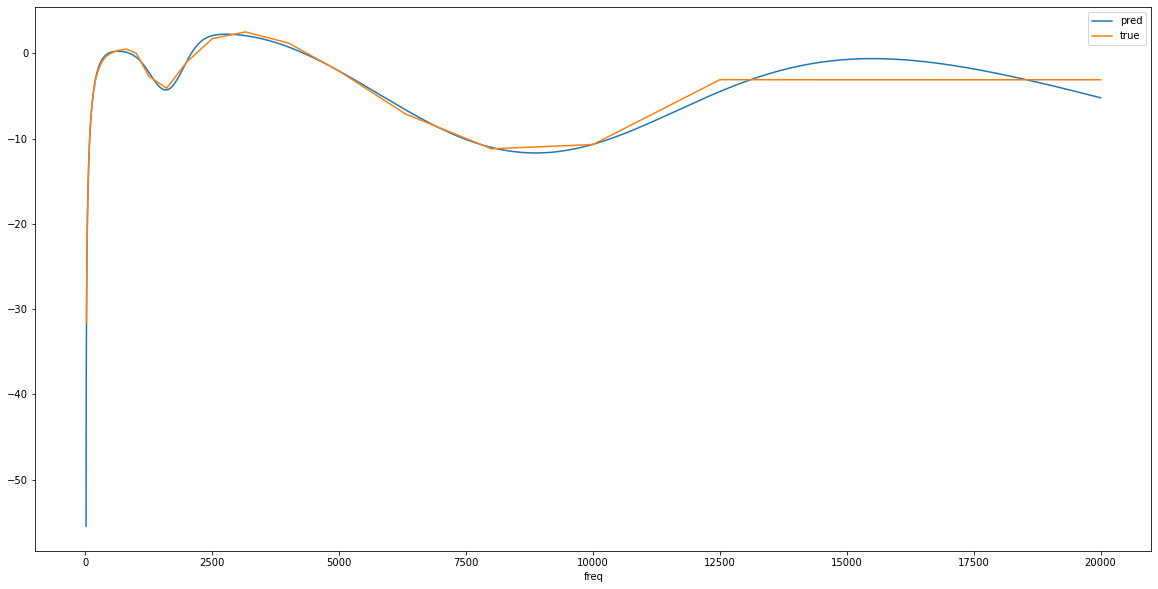

res.x=array([-1.64433785e+02, -2.10692436e+01,  8.30609509e+01,  1.32945921e+01,
        4.60795058e+00,  5.10280480e-02,  1.12728328e+00, -2.38605854e+01,
        4.24443844e-02,  1.75220290e+00,  9.23388482e-06, -3.28913733e-03,
       -5.37290840e+01])


<ipython-input-4-cc5d60b7d9d6>:30: RuntimeWarning: invalid value encountered in log
  return params[0] + params[1] * np.log(params[2] * (x - params[3])) + 5*params[4] * np.exp(-0.00001*params[5]*(x-1200*params[6])**2) - 10*params[7]*np.exp(-0.0000001*params[8]*(x-3300*params[9])**2) + 20*params[10]*np.exp(-0.00000001*params[11]*(x-12000*params[12])**2)


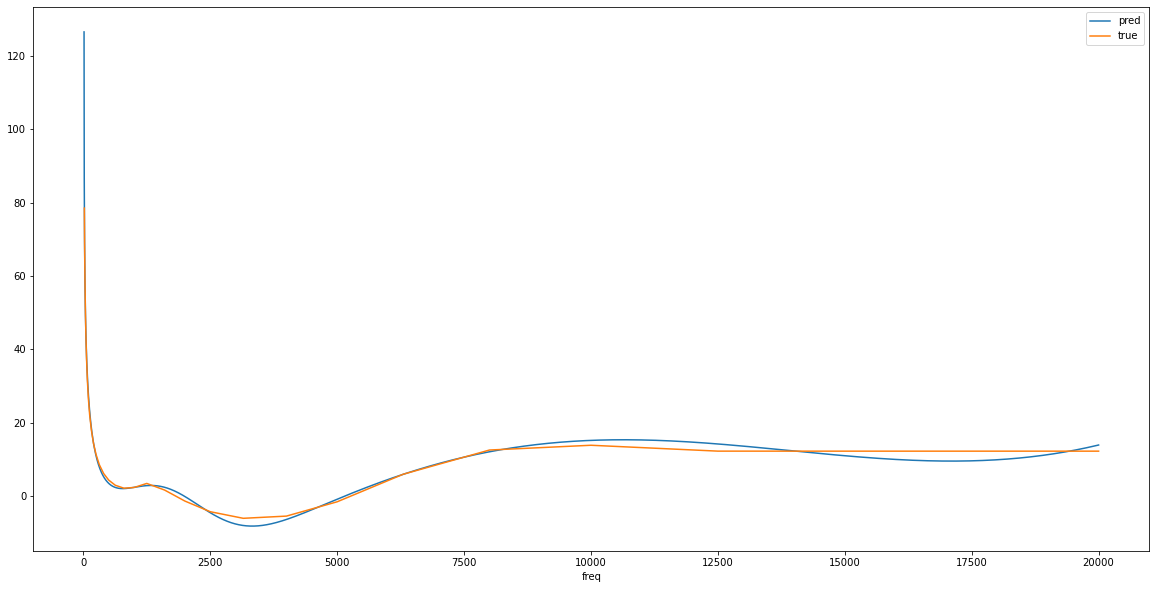

In [4]:
#@title Use scipy to find least_squares fits for each column of ISO 226 constants

def error(params, idx, pred):
  return (ISO_226_constant_table[:, idx] - pred(ISO_226_constant_table[:, 0], params)) / np.log(ISO_226_constant_table[:, 0])

def minimize(idx, pred, params):
  res = scipy.optimize.least_squares(functools.partial(error, idx=idx, pred=pred), np.ones((params,)))
  print(f'{res.x=}')
  x = np.linspace(10.0, 20000.0, 10000)
  _, ax = plt.subplots(figsize=(20, 10))
  pd.DataFrame(np.asarray([x, pred(x, res.x)]).T, columns=['freq', 'pred']).plot(x='freq', y='pred', ax=ax)
  pd.DataFrame(np.asarray([ISO_226_constant_table[:, 0], ISO_226_constant_table[:, idx]]).T, columns=['freq', 'true']).plot(x='freq', y='true', ax=ax)
  plt.show()
  return res.x

def predict_a_f(x, params):
  """A combination of log, 2nd degre polynomial, and a single gaussian fits the a_f parameter."""
  return params[0] - params[1] * np.log(params[2] * (x-params[3])) + 0.04 * params[4] * np.exp(-(0.0000001*params[5]*(x-14000*params[6])**2)) - 0.03 * params[7] * np.exp(-(0.0000001*params[8]*(x-5000*params[9])**2))

a_f_params = minimize(1, predict_a_f, 10)

def predict_L_U(x, params):
  """A combination of log and 3 gaussians fits the L_U parameter."""
  return params[0] + params[1] * np.log(params[2] * (x - params[3])) - 5*params[4]* np.exp(-0.00001*params[5]*(x-1500*params[6])**2) + 5*params[7]* np.exp(-0.000001*params[8]*(x-3000*params[9])**2) - 15*params[10]*np.exp(-0.0000001*params[11]*(x-8000*params[12])**2) - 5*params[13]*np.exp(-0.00000001*params[14]*(x-20000*params[15])**2)

L_U_params = minimize(2, predict_L_U, 16)

def predict_T_f(x, params):
  """A combination of log, 3nd degre polynomial, and a single gaussian fits the T_f parameter."""
  return params[0] + params[1] * np.log(params[2] * (x - params[3])) + 5*params[4] * np.exp(-0.00001*params[5]*(x-1200*params[6])**2) - 10*params[7]*np.exp(-0.0000001*params[8]*(x-3300*params[9])**2) + 20*params[10]*np.exp(-0.00000001*params[11]*(x-12000*params[12])**2)

T_f_params = minimize(3, predict_T_f, 13)

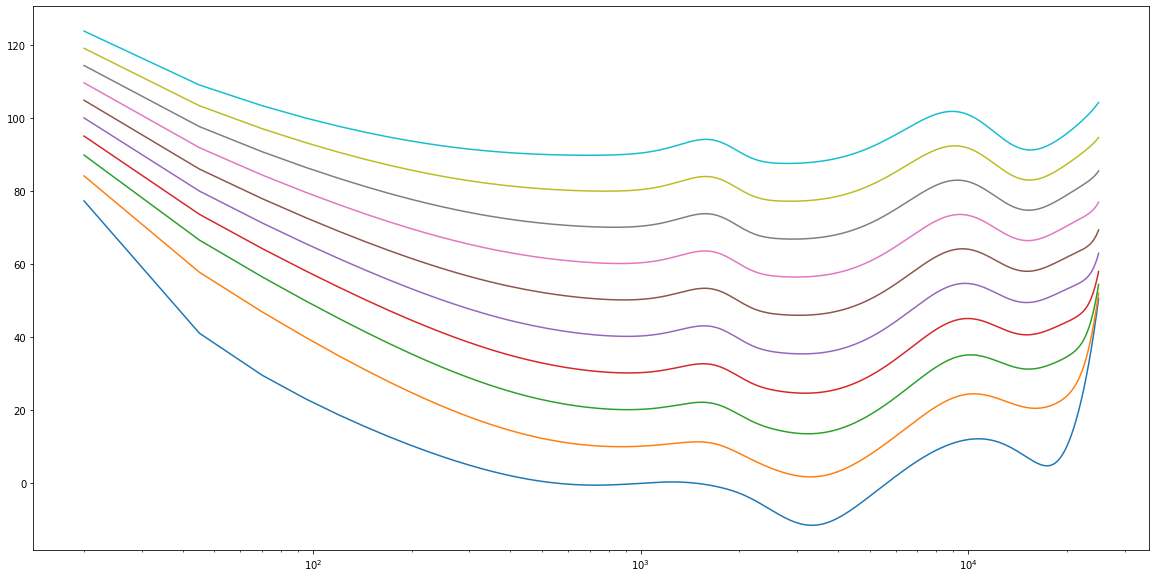

In [5]:
 def spl_from_phons(phons, freq):
    a_f = predict_a_f(freq, a_f_params)
    L_U = predict_L_U(freq, L_U_params)
    T_f = predict_T_f(freq, T_f_params)
    A_f = 4.47e-3 * ((10 ** (0.025 * phons)) - 1.15)
    A_f += (0.4 * (10 ** ((T_f + L_U) / 10 - 9))) ** a_f
    return 10.0 / a_f * np.log10(A_f) - L_U + 94.0

_, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.set_xscale('log')
for phons in range(0, 100, 10):
  freqs = np.linspace(20, 25000, 1000)
  ax.plot(freqs, spl_from_phons(phons, freqs))

<ipython-input-6-5995444cbf3f>:10: RuntimeWarning: invalid value encountered in log10
  return 40 * np.log10(B_f) + 94


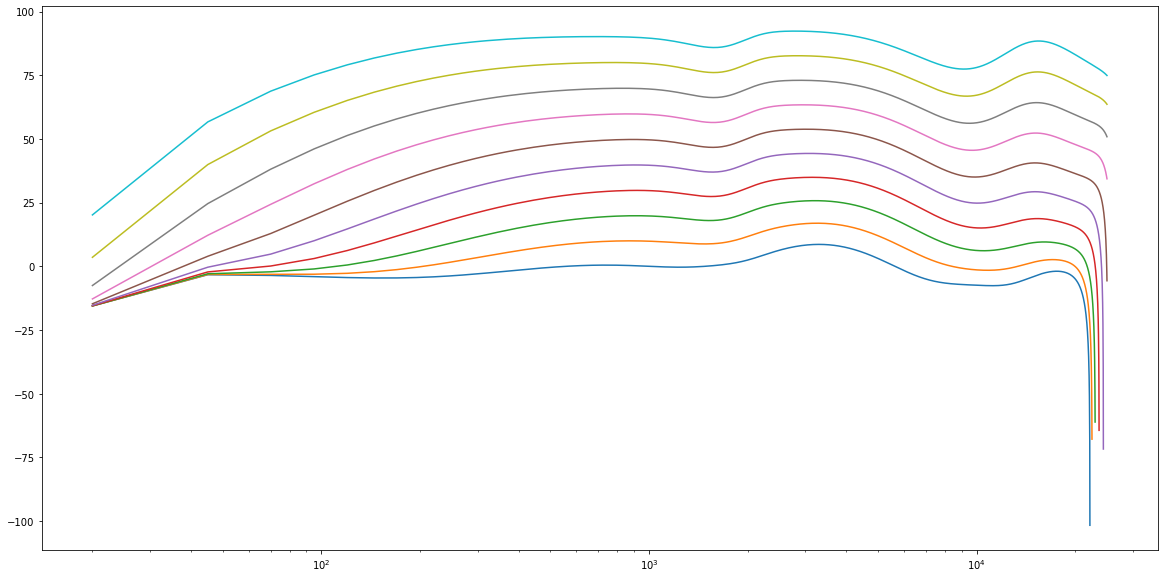

In [6]:
def phons_from_spl(spl, freq):
  a_f = predict_a_f(freq, a_f_params)
  L_U = predict_L_U(freq, L_U_params)
  T_f = predict_T_f(freq, T_f_params)

  def expf(x):
    return (0.4 * (10 ** ((x + L_U) / 10 - 9))) ** a_f

  B_f = expf(spl) - expf(T_f) + 0.005135
  return 40 * np.log10(B_f) + 94

_, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.set_xscale('log')
for spl in range(0, 100, 10):
  freqs = np.linspace(20, 25000, 1000)
  ax.plot(freqs, phons_from_spl(spl, freqs))

In [9]:
predict_T_f(100, T_f_params)

27.646096643854946